<a href="https://colab.research.google.com/github/AlexCarvallho19/IA/blob/main/ad_lab2_AlexCarvallho19_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados - UFPB

**Professor** : Marcus Carvalho

Aluno: [Alex Kardell Leite de Carvalho]

## Laboratório: Análise Exploratória de Dados

Você deve usar os dados de séries do IMDB (_Internet Movie DataBase_) para fazer uma análise exploratória de dados de um seriado. Os dados estão no arquivo `'dados/avaliacao_episodios_series_top.csv`. Você deve escolher uma das séries que estão no arquivo para analisar. A série deve ter no mínimo 4 temporadas para permitir uma análise mais detalhada. A análise deve ser feita neste relatório Jupyter Notebook.  O relatório já possui algumas perguntas a serem respondidas. Use as perguntas como base, mas não fique preso a elas. Você pode fazer novas perguntas e novas análises à vontade.

Abaixo tem o código de exemplo para carregar os dados dos episódios e filtrar uma série específica. Modifique o código para filtra a série da sua escolha.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Substitua o filtro com o nome da série que você deseja analisar
episodios = (
    pd.read_csv('/avaliacao_episodios_series_top.csv')
    .query("nome_serie == 'The Walking Dead'")
)
episodios

,id_serie,nome_serie,id_episodio,temporada,num_episodio,nome_episodio,ano,generos,duracao_minutos,avaliacao_media,num_votos
6906,tt1520211,The Walking Dead,tt1589921,1.0,1.0,Days Gone Bye,2010,"Drama,Horror,Thriller",67.0,9.2,24968
6907,tt1520211,The Walking Dead,tt1628064,1.0,2.0,Guts,2010,"Drama,Horror,Thriller",45.0,8.6,15764
6908,tt1520211,The Walking Dead,tt1628065,1.0,3.0,Tell It to the Frogs,2010,"Drama,Horror,Thriller",44.0,8.2,14444
6909,tt1520211,The Walking Dead,tt1628066,1.0,4.0,Vatos,2010,"Drama,Horror,Thriller",45.0,8.5,14120
6910,tt1520211,The Walking Dead,tt1628067,1.0,5.0,Wildfire,2010,"Drama,Horror,Thriller",45.0,8.1,13565
...,...,...,...,...,...,...,...,...,...,...,...
7070,tt1520211,The Walking Dead,tt12772900,11.0,12.0,The Lucky Ones,2022,"Drama,Horror,Thriller",52.0,7.1,3670
7071,tt1520211,The Walking Dead,tt12772904,11.0,13.0,Warlords,2022,"Drama,Horror,Thriller",44.0,8.4,4085
7072,tt1520211,The Walking Dead,tt12772906,11.0,14.0,The Rotten Core,2022,"Drama,Horror,Thriller",43.0,8.4,3774
7073,tt1520211,The Walking Dead,tt12772908,11.0,15.0,Trust,2022,"Drama,Horror,Thriller",46.0,7.5,3215


## Popularidade dos episódios

### Qual a distribuição de votos que cada episódio teve?

Explore a popularidade de cada episódio analisando a quantidade de votos que cada um recebeu (`num_votos`). Exiba visualizações das distribuções e calcule estatísticas de centralidade e dispersão para esta variável.

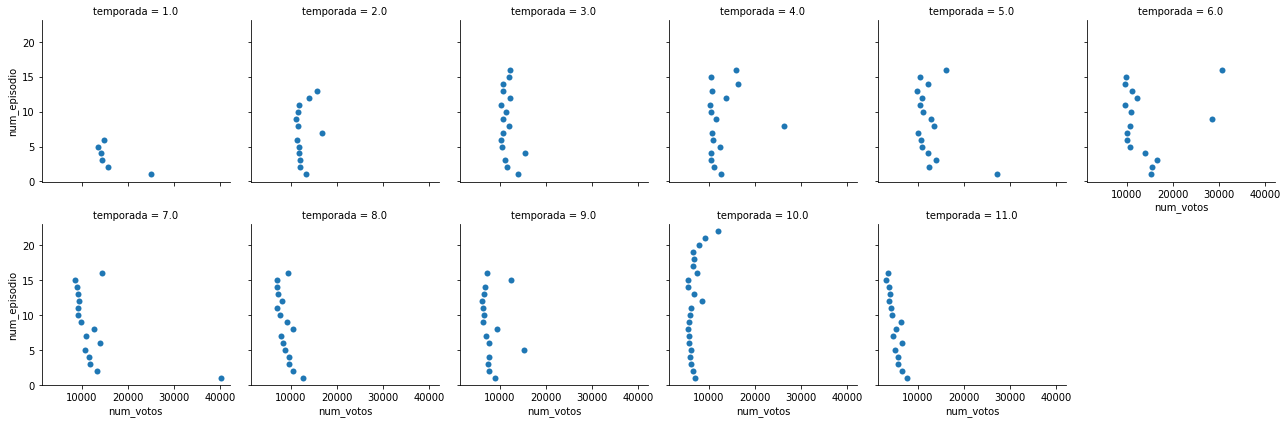

In [11]:
# INSIRA SEU CÓDIGO AQUI

from tracemalloc import Snapshot

g = sns.FacetGrid(episodios, col="temporada", col_wrap=6)
ax = g.map_dataframe(sns.scatterplot, x="num_votos", y="num_episodio", alpha=1, linewidth=0)

# É notório que na maioria das temporadas os episódios de cada temporada tiveram praticamente 
# a mesma média de votos, com algumas exceções, por exemplo na 4, 5, e 6 com episódios fora da tendencia.

In [6]:
print(f"Média: {episodios['num_votos'].mean()} / Mediana: {episodios['num_votos'].median()} / Moda: {(episodios['num_votos'].mode())}")

Média: 10577.538461538461 / Mediana: 10449.0 / Moda: 0       3215
1       3590
2       3670
3       3774
4       4085
       ...  
164    26436
165    27128
166    28572
167    30563
168    40271
Length: 169, dtype: int64


### Qual o episódio mais popular (com mais votos)?

In [7]:
# INSIRA SEU CÓDIGO AQUI
episodios.loc[episodios['num_votos'] == episodios['num_votos'].max()]

,id_serie,nome_serie,id_episodio,temporada,num_episodio,nome_episodio,ano,generos,duracao_minutos,avaliacao_media,num_votos
6989,tt1520211,The Walking Dead,tt5164772,7.0,1.0,The Day Will Come When You Won't Be,2016,"Drama,Horror,Thriller",46.0,9.2,40271


### Qual o episódio menos popular (com menos votos)?

In [8]:
# INSIRA SEU CÓDIGO AQUI
episodios.loc[episodios['num_votos'] == episodios['num_votos'].min()]

,id_serie,nome_serie,id_episodio,temporada,num_episodio,nome_episodio,ano,generos,duracao_minutos,avaliacao_media,num_votos
7073,tt1520211,The Walking Dead,tt12772908,11.0,15.0,Trust,2022,"Drama,Horror,Thriller",46.0,7.5,3215


### Qual a temporada mais popular?

In [9]:
# INSIRA SEU CÓDIGO AQUI

popular = episodios.groupby(["temporada"]).sum("num_votos").reset_index()
popular.loc[popular['num_votos'] == popular['num_votos'].max()]


,temporada,num_episodio,ano,duracao_minutos,avaliacao_media,num_votos
5,6.0,136.0,32248,752.0,132.3,225244


### Qual a temporada menos popular?

In [10]:
# INSIRA SEU CÓDIGO AQUI
popular.loc[popular['num_votos'] == popular['num_votos'].min()]

,temporada,num_episodio,ano,duracao_minutos,avaliacao_media,num_votos
10,11.0,136.0,32344,731.0,126.6,80512


## Qualidade dos episódios

### Qual a distribuição de avaliações que cada episódio teve?

Explore a qualidade de cada episódio analisando a avaliação média que cada um recebeu (`avaliacao_media`). Exiba visualizações das distribuções e calcule estatísticas de centralidade e dispersão para esta variável.


Média: 7.92603550295858 / Mediana: 7.9 / Moda: 7.9
Desvio padrão: 0.8357540214957525 / Variância: 0.6984847844463228 / Desvio absoluto: 0.6229473757921641


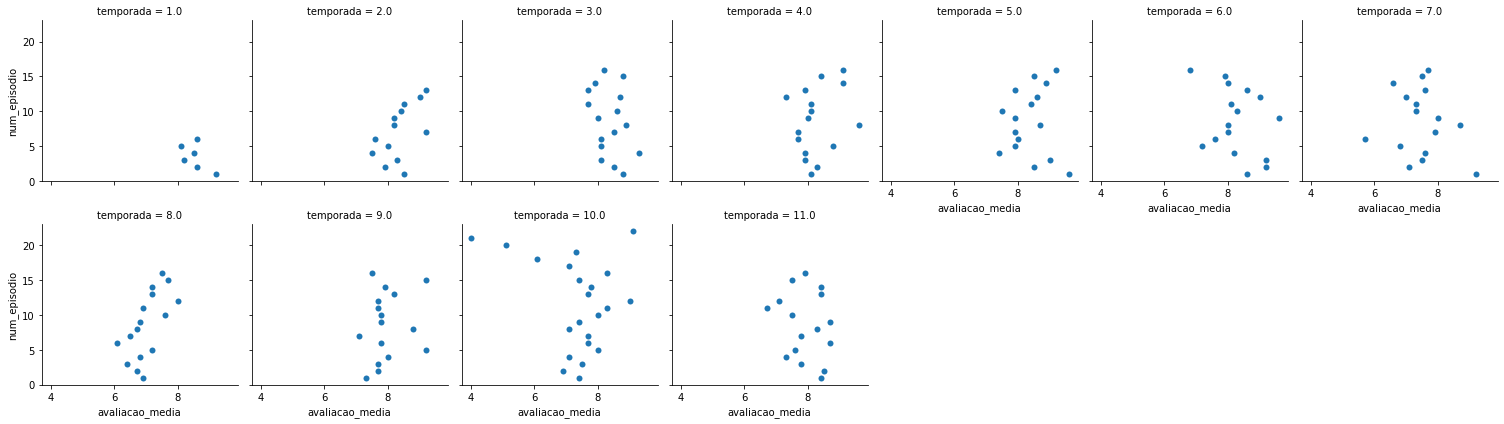

In [14]:
# INSIRA SEU CÓDIGO AQUI

#Medidas de centralidade e dispersão, respectivamente.
print(f"Média: {episodios['avaliacao_media'].mean()} / Mediana: {episodios['avaliacao_media'].median()} / Moda: {episodios['avaliacao_media'].median()}")

print(f"Desvio padrão: {episodios['avaliacao_media'].std()} / Variância: {episodios['avaliacao_media'].var()} / Desvio absoluto: {episodios['avaliacao_media'].mad()}")


g = sns.FacetGrid(episodios, col="temporada", col_wrap=7)
ax = g.map_dataframe(sns.scatterplot, x="avaliacao_media", y="num_episodio", alpha=1, linewidth=0)

# analisando o gráfico que avalia a qualidade dos episódios de 0 a 10, há uma boa avaliação >=6.
# exceto na temporada 10 em que há episódios a baixo dessa margem.
##----------------------------##--------------------------------------------
# Já nalisando as medidas de dispersão, há muita variância de dados em diversas temporadas.
# Com exceção da 1° em que há pouco dado para se analisar e ter uma certeza.



### Qual o melhor episódio da série de acordo com as avaliações do IMDB?

In [15]:
episodios.loc[episodios['avaliacao_media'] == episodios['avaliacao_media'].max()]

,id_serie,nome_serie,id_episodio,temporada,num_episodio,nome_episodio,ano,generos,duracao_minutos,avaliacao_media,num_votos
6948,tt1520211,The Walking Dead,tt2948638,4.0,8.0,Too Far Gone,2013,"Drama,Horror,Thriller",43.0,9.6,26436
6957,tt1520211,The Walking Dead,tt3297776,5.0,1.0,No Sanctuary,2014,"Drama,Horror,Thriller",42.0,9.6,27128
6981,tt1520211,The Walking Dead,tt4575388,6.0,9.0,No Way Out,2016,"Drama,Horror,Thriller",43.0,9.6,28572


### Qual o pior episódio da série de acordo com as avaliações do IMDB?

In [16]:
episodios.loc[episodios['avaliacao_media'] == episodios['avaliacao_media'].min()]

#Acredito que não se possa tirar uma avaliação sobre este episódio pelo fato de ser recente e um 
# dos últimos da série, acredito ter poucos votos por ser recente e fim de série.

,id_serie,nome_serie,id_episodio,temporada,num_episodio,nome_episodio,ano,generos,duracao_minutos,avaliacao_media,num_votos
7057,tt1520211,The Walking Dead,tt12772746,10.0,21.0,Diverged,2021,"Drama,Horror,Thriller",42.0,4.0,9124


### Qual a melhor temporada da série de acordo com as avaliações do IMDB?

In [17]:
popular.loc[popular['avaliacao_media'] == popular['avaliacao_media'].max()]

,temporada,num_episodio,ano,duracao_minutos,avaliacao_media,num_votos
9,10.0,253.0,44438,1007.0,162.0,149143


## Relação entre variáveis

Analise a relação entre as variáveis referentes a cada episódio. Explore visualmente a relação entre elas e calcula estatísticas de correlação.

### Existe alguma relação entre a quantidade de votos recebida e a avaliação média dos episódios?

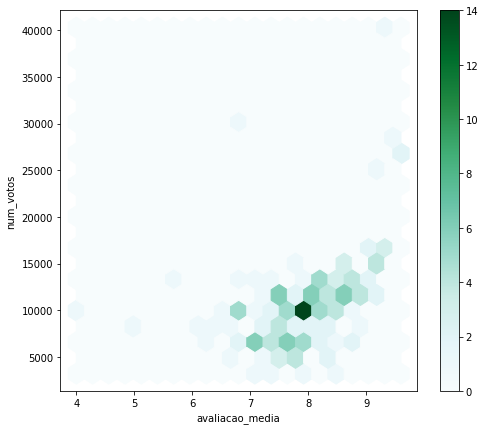

In [31]:
ax = episodios.plot.hexbin(x='avaliacao_media', y='num_votos', gridsize=20, sharex=False, figsize=(8, 7))

#Usando o gráfico de hexbin para visualização dos votos em relação a media.

#Nota se que os dados estão concentrados na média 6-8 com menos de 20.000 votos
#com avaliação média de 10mil.
#Portanto, confirma a correlação, a avaliação média é entre 10-15 mil votos e média de 10 mil (ponto mais escuro no gráfico).

### Existe alguma relação entre a quantidade de votos recebida e o número do episódio?

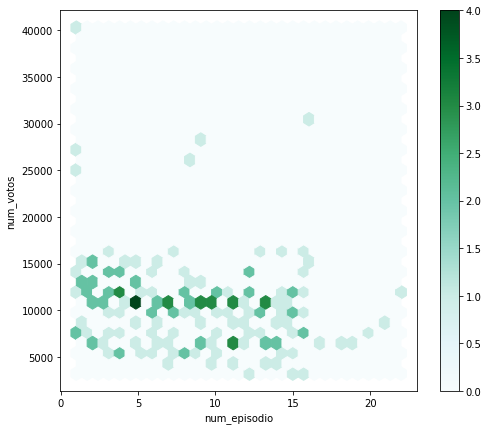

In [32]:
ax = episodios.plot.hexbin(x='num_episodio', y='num_votos', gridsize=30, sharex=False, figsize=(8, 7))

# Ao meu ver, há uma considerável relação entre votos recebidos e número de episódios,
# pelo fato de grande maioria estar entre 5 a 15 mil votos, com pequenas exceções.
# Acredito que pelo sucesso da série, esta muito bem dividida e correlativas as 
# opiniões dos telespectadores.

## Padrões temporais

Explore as avaliações de temporadas e episódios ao longo do tempo.

### As primeiras temporadas são melhor avaliadas do que as últimas?

In [34]:
popular[['temporada','avaliacao_media']].sort_values('avaliacao_media', ascending = False)

# Com exceção da temporada 1 com média 50 e as demais em torno de 120,
# ao contrário da pergunta, a primeira temporada é menos avaliada do que as demais.

,temporada,avaliacao_media
0,1.0,51.2
1,2.0,108.5
7,8.0,112.2
6,7.0,119.5
10,11.0,126.6
8,9.0,127.4
3,4.0,132.0
5,6.0,132.3
2,3.0,133.9
4,5.0,133.9


### Os episódios no fim das temporadas são melhor avaliados do que os do início?

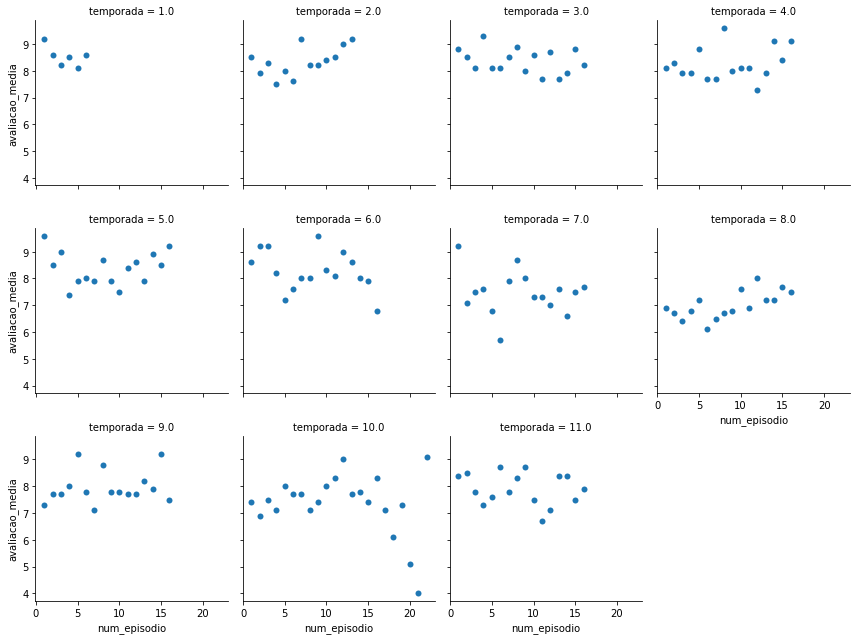

In [35]:
#visualização de gráfico de numero de episódio eixo(x) em relação a avaliacao media(y).

g = sns.FacetGrid(episodios, col="temporada", col_wrap=4)
ax_temp = g.map_dataframe(sns.scatterplot, x="num_episodio", y="avaliacao_media", alpha=1, linewidth=0,)

#Na temporada 1 o último episódio é menos bem avaliado do que o primeiro.
#Na temporada 2 o último episódio é mais bem avaliado do que o primeiro.
#Na temporada 3 o último episódio e os primeiros são praticamentes avaliados da mesma forma.
#Na temporada 4 o último episódio é mais bem avaliado do que o primeiro, porém no meio há grande oscilação.
#Na temporada 5 começa em alta, vai abaixando, e logo sobe novamente a avaliação média.
#Já na 6, começa alta, abaixa, depois sobe e ao final baixa drasticamente.
# Na 7 começa alta e baixa drasticamente (Personagens principais passam maus bocados) e depois se estabiliza. (Personagens voltam a normalidade)
# Na 8 não há discrepância nas avaliações, seguem a mesma média.
# Na 9 começa havendo uma alta na média, há sobe e desce, mas termina praticamente na média inicial.
# Já na 10 é a que chama mais atenção pelo fato de vir numa pequena crescida e drasticamente cai no último episódio,
# e já no seguinte e ultimo episódio vai ao topo. (Algo de muito bom aconteceu)
#Na 11 começa havendo uma alta na média, há sobe e desce, mas termina praticamente na média inicial.

### Qual é a temporada mais regular? (com menor variação de avaliações)

In [ ]:
#Acredito que as temporadas 3 é a mais regular.

### Qual é a temporada mais instável? (com maior variação de avaliações)

In [ ]:
#Acredito que a temporada 10 é a menos regular pela oscilação da avaliação media a cada episodio.

## Valores incomuns

Existem outliers nos dados?

In [ ]:
# Sim, em destaque, no penúltimo episódio da temporada 10 há uma drática queda na avaliação média,
# e logo no episódio seguinte há uma grande alta.

### Existem episódios outliers em termos de popularidade?

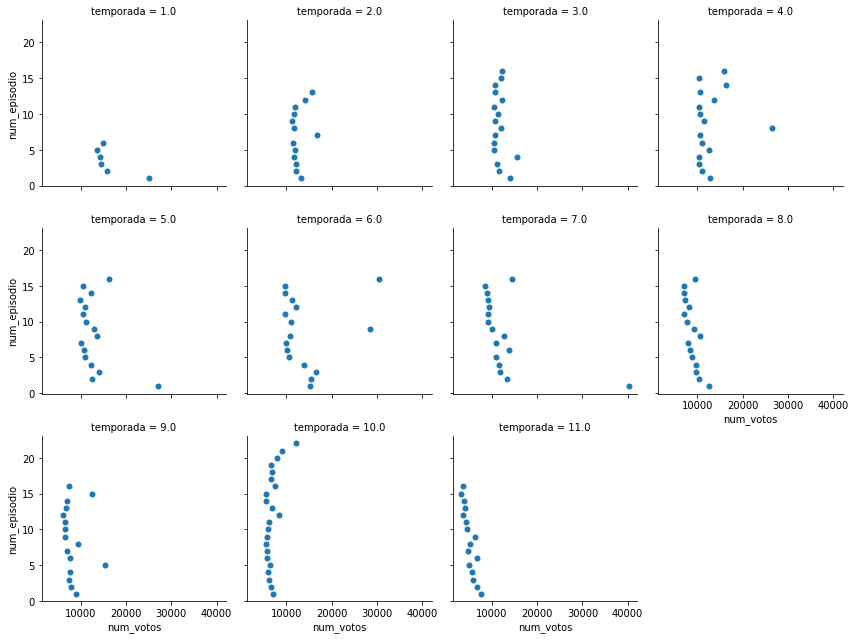

In [36]:
g = sns.FacetGrid(episodios, col="temporada", col_wrap=4)
ax = g.map_dataframe(sns.scatterplot, x="num_votos", y="num_episodio", alpha=1, linewidth=0,)

# Sim, em diversas temporadas como: 1, 4, 5, 6, 7, acredito que 9 também.

### Existem episódios outliers em termos de avaliação recebida?


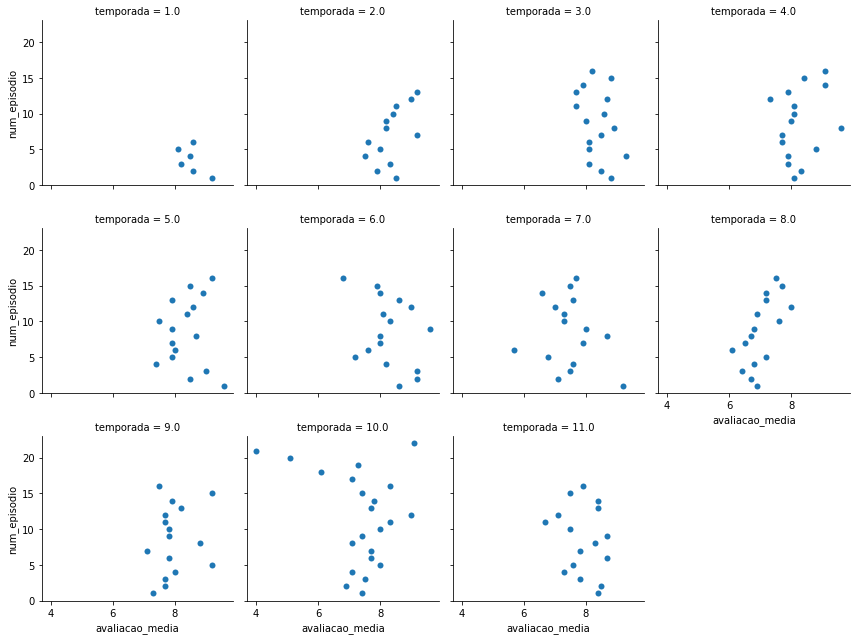

In [38]:
g = sns.FacetGrid(episodios, col="temporada", col_wrap=4)
ax_temp = g.map_dataframe(sns.scatterplot, x="avaliacao_media", y="num_episodio", alpha=1, linewidth=0,)


In [ ]:
# Com relação a avaliação recebida, percebe-se no gráfico que há outliers em diversas temporadas, exceto 2, 3, 8, 11.